In [ ]:
#The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived (S), their age (A), their passenger-class (C), their sex (G) and the fare they paid (X).
"""
Data description:
Survival: 0 = No, 1 = Yes
Pclass: Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
Name
Sex
Age
Sibsp: Number of Siblings/ Spouses Aboard
Parch: Number of Parents/ Children Aboard
Ticket: Ticket Number
Fare: Passenger Fare
Cabin
Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
"""

import numpy as np
import pandas as pd
import requests
import io

url = "https://github.com/datasciencedojo/datasets/raw/master/titanic.csv"
download = requests.get(url).content
titanic = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [ ]:
titanic.shape

(891, 12)

In [ ]:
#We put PassengerId as the index:
titanic.rename(index= titanic.PassengerId, inplace= True)
titanic.drop('PassengerId', axis= 1, inplace= True)

In [ ]:
print (titanic.head(10))

In [ ]:
titanic.tail(10)

In [ ]:
import sklearn as preprocessing
titanic.describe()

In [ ]:
#there is something wrong about the Age! Or it is just the months and days which being added to any passenger's age.
titanic.Age.value_counts()

In [ ]:
titanic.isnull().sum()
#the output shows that there are too many missing values in the Cabin.

In [ ]:
#So we delete the Cabin:
titanic.drop('Cabin', inplace= True, axis= 1)

In [ ]:
#Now we take care of Age, so we fill NaNs with the mean of Age:
titanic[['Age']] = titanic[['Age']].fillna(titanic[['Age']].mean())

In [ ]:
titanic.Age.sort_values()

In [ ]:
#It is alright now :)

In [ ]:
titanic.Embarked.value_counts()

In [ ]:
#Now it is just Embarkes values which have NaNs. We fill them with S (because it is more likely for them to be S!):
titanic= titanic.fillna('S')

In [ ]:
titanic.isnull().sum()

In [ ]:
#Now we are all set!

In [ ]:
#we delete dupplicates:
titanic.duplicated().sum()
#the output shows that we do not have any duplicates.

In [ ]:
!pip install seaborn
import seaborn as sb
import matplotlib.pyplot as plt
num_var= titanic.drop([], axis= 1)
corr= num_var.corr()
sb.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, vmin= -1, vmax= +1)
plt.show()

"""
the output shows that:
there is no correlation between Age and Survived,
there is a meaningful correlation between Pclass and Survived,
there is no meaningful correlation between Fare and Survived,
there is no meaningful correlation between Parch and Survived.
"""

In [ ]:
#We use PairPlot to get good insight of numerical values against each other:
sb.pairplot(titanic, hue= 'Survived', palette= 'hls', plot_kws= {'s': 80})

In [ ]:
count= titanic.Age.value_counts()
category= count.index
plt.bar(category, count, color= ['aqua', 'green', 'violet', 'yellow', 'pink', 'black'])
plt.xlabel('Age')
plt.ylabel('How Many')
plt.yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200])
plt.show()

In [ ]:
count= titanic.Pclass.value_counts()
category= count.index
plt.bar(category, count, color= ['darkorange', 'c', 'black'])
plt.xlabel('Pclass')
plt.ylabel('How Many')
plt.xticks([1, 2, 3])
plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
plt.show()
#there were too many at 3rd class.

In [ ]:
count= titanic.Survived.value_counts()
category= count.index
plt.bar(category, count, color= ['forestgreen', 'crimson'])
plt.xlabel('Survived')
plt.ylabel('How Many')
plt.xticks([0, 1])
plt.yticks([0, 100, 200, 300, 400, 500, 600])
plt.show()
#most of them passed away :(

In [ ]:
count= titanic.Sex.value_counts()
category= count.index
plt.bar(category, count, color= ['y', 'maroon'])
plt.xlabel('Sex')
plt.ylabel('How Many')
plt.xticks([0, 1])
plt.yticks([0, 100, 200, 300, 400, 500, 600])
plt.show()
#most of passengers were men.

In [ ]:
count= titanic.Embarked.value_counts()
category= count.index
plt.bar(category, count, color= ['springgreen', 'indianred', 'teal'])
plt.xlabel('Embarked')
plt.ylabel('How Many')
plt.xticks([0, 1, 2])
plt.yticks([0, 100, 200, 300, 400, 500, 600])
plt.show()
#most of passengers embarked from Southampton.

Supervised Learning

In [ ]:
titanic.drop(['Name', 'Ticket'], inplace= True, axis= 1)

In [ ]:
#We have to turn categorical values of Sex to numeric ones:
sex= pd.get_dummies(titanic['Sex'])
titanic_new = pd.concat([titanic, sex], axis=1)
titanic_new.drop('Sex', inplace= True, axis= 1)

In [ ]:
#and also for Embarked:
embarked= pd.get_dummies(titanic_new['Embarked'])
titanic_new = pd.concat([titanic_new, embarked], axis=1)
titanic_new.drop('Embarked', inplace= True, axis= 1)

titanic_new

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [ ]:
#x= data, y= target
x= titanic_new.drop('Survived', axis= 1)
y= titanic_new['Survived']
titanic_new.drop('Survived', axis= 1, inplace= True)

In [ ]:
titanic_new['target']= y
titanic_new

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,target
1,3,22.000000,1,0,7.2500,0,1,0,0,1,0
2,1,38.000000,1,0,71.2833,1,0,1,0,0,1
3,3,26.000000,0,0,7.9250,1,0,0,0,1,1
4,1,35.000000,1,0,53.1000,1,0,0,0,1,1
5,3,35.000000,0,0,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.000000,0,0,13.0000,0,1,0,0,1,0
888,1,19.000000,0,0,30.0000,1,0,0,0,1,1
889,3,29.699118,1,2,23.4500,1,0,0,0,1,0
890,1,26.000000,0,0,30.0000,0,1,1,0,0,1


Visual EDA

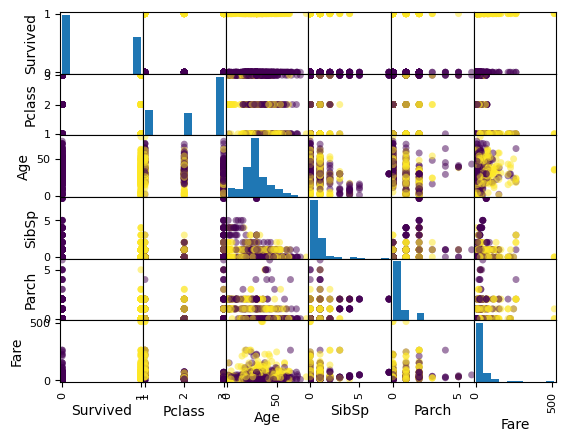

In [ ]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(titanic, c= y, s= 100)
plt.show()

train & test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 42, stratify= y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
predict_dtc= dtc.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, predict_dtc)

1.0

In [ ]:
#Wooooooo!!!!

Tunning Hyperparameters

GridSearchCross_Validation

In [ ]:
from scipy.stats import randint  #to get random integers
randint(1, 9).rvs(3)  #to generate 3 integers from 1- 9

array([7, 2, 8])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
params= {'max_depth': [None, 3], 'max_features': randint(1, 9), 'min_samples_leaf': randint(1, 9)}
tree= DecisionTreeClassifier()
tree_cv= RandomizedSearchCV(tree, params, cv= 10)
tree_cv.fit(x_train, y_train)
print(tree_cv.best_params_)  #these are optimized

{'max_depth': None, 'max_features': 8, 'min_samples_leaf': 4}


In [ ]:
print(tree_cv.best_score_)  #showing the accuracy

0.9983870967741936


In [ ]:
#trying score on test:
score= tree_cv.score(x_test, y_test)
print(score)

1.0


Random Forest

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size= 0.7, random_state= 42)
RF= RandomForestClassifier(random_state= 42, n_jobs= -1, max_depth= 5, n_estimators= 100, oob_score= True)
RF.fit(x_train, y_train)
RF.oob_score_  #to show the accuaracy, instead of evaluating the model

1.0